In [32]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import re

In [33]:
# set parameters
np.random.seed(0)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
data_dir = "data/cinic10"

batch_size = 64
epochs = 50

steps_per_epoch = 1e10
steps_per_epoch = min(steps_per_epoch, 90000/batch_size)

In [34]:
# create generators for the training and test sets



datagenTrain = ImageDataGenerator(
    width_shift_range=0.05,
    height_shift_range=0.05,
    rotation_range=10,
    shear_range=0.3,
    horizontal_flip=True,
    fill_mode="reflect",
    )
datagenTest = ImageDataGenerator()
train_generator = datagenTrain.flow_from_directory(
    data_dir + "/train",
    target_size=(32, 32),  # Resize images to this size
    batch_size=batch_size,  # Number of images to load at each iteration
    class_mode="categorical",
)  # Type of classification ('binary' or 'categorical')

test_generator = datagenTest.flow_from_directory(
    data_dir + "/test",
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


In [35]:
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax')  # CINIC-10 has 10 classes
])


# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
)


Epoch 1/50


2024-03-22 00:31:26.638536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1407/1407 [==============================] - ETA: 0s - loss: 1.3009 - accuracy: 0.5416

2024-03-22 00:34:14.282815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1407/1407 [==============================] - 205s 142ms/step - loss: 1.3009 - accuracy: 0.5416 - val_loss: 1.0274 - val_accuracy: 0.6350
Epoch 2/50
1407/1407 [==============================] - 190s 135ms/step - loss: 1.0265 - accuracy: 0.6405 - val_loss: 0.9945 - val_accuracy: 0.6536
Epoch 3/50
1407/1407 [==============================] - 214s 152ms/step - loss: 0.9467 - accuracy: 0.6679 - val_loss: 0.9452 - val_accuracy: 0.6691
Epoch 4/50
1407/1407 [==============================] - 204s 145ms/step - loss: 0.8974 - accuracy: 0.6835 - val_loss: 0.9044 - val_accuracy: 0.6809
Epoch 5/50
1407/1407 [==============================] - 203s 144ms/step - loss: 0.8579 - accuracy: 0.6967 - val_loss: 0.9392 - val_accuracy: 0.6715
Epoch 6/50
1407/1407 [==============================] - 199s 141ms/step - loss: 0.8268 - accuracy: 0.7088 - val_loss: 0.8902 - val_accuracy: 0.6870
Epoch 7/50
1407/1407 [==============================] - 208s 148ms/step - loss: 0.7932 - accuracy: 0.7193 - val_loss: 0.891

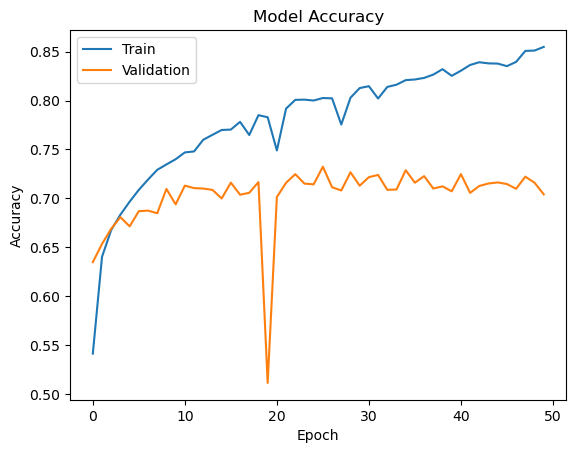

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
